<b>1.Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

<b>2.Importing the dataset

In [2]:
customer_data = pd.read_csv('Mall_Customers.csv')

In [3]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
customer_data.shape

(200, 5)

In [5]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
customer_data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
customer_data.duplicated().sum()

0

<b>So we can see, we don't have any null values or any duplicates in our dataset

In [8]:
customer_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<b>In detecting cluster or in our data, we won't be requiring CustomerID,gender and Age column, as it will not much value in our algorithm, so better we will drop it

In [9]:
customer_data.drop(columns=['CustomerID','Gender','Age'],axis=1,inplace=True)

In [10]:
customer_data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [11]:
X = customer_data.values

In [12]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

### <b>Detecting efficient number of clusters using wcss values/elbow method

In [13]:
wcss = []

for i in range (1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\ketan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [14]:
wcss[:5]

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371]

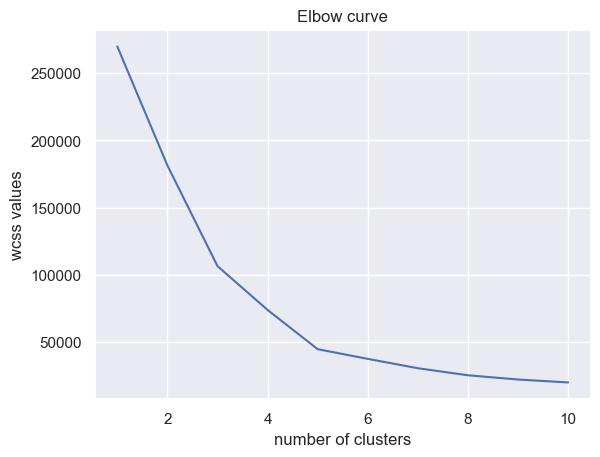

In [15]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('Elbow curve')
plt.xlabel('number of clusters')
plt.ylabel('wcss values')
plt.show()

<b>From above elbow curve we can see that, at x=3 and x=5, there is not much significant change in value, so we will try hyperparameter tuning with k value as 3 and 5

In [16]:
from sklearn.model_selection import RandomizedSearchCV

In [25]:
params = {
    'n_clusters':[3,5],
    'algorithm':['lloyd','elkan'],
    'init':['k-means++','random']
}

In [26]:
rsv = RandomizedSearchCV(KMeans(),params,n_iter=5)

In [27]:
rsv.fit(X)

C:\Users\ketan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ketan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 678, in _fit_and_score
    estimator.fit(X_train, **fit_params)
  File "C:\Users\ketan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py", line 1146, in fit
    self._check_params(X)
  File "C:\Users\ketan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py", line 956, in _check_params
    raise ValueError(
ValueError: Algorithm must be 'auto', 'full' or 'elkan', got lloyd

RandomizedSearchCV(estimator=KMeans(), n_iter=5,
                   param_distributions={'algorithm': ['lloyd', 'elkan'],
                                        'init': ['k-means++', 'random'],
                                        'n_clusters': [3, 5]})

In [28]:
rsv.best_params_

{'n_clusters': 5, 'init': 'k-means++', 'algorithm': 'elkan'}

<b>Let's go with above params in kmeans algorithm

In [29]:
kmeans = KMeans(n_clusters=5,algorithm='elkan',init='k-means++')

In [30]:
y = kmeans.fit_predict(X)

In [31]:
y

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 4,
       2, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 1, 0, 4, 0, 1, 0, 1, 0,
       4, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

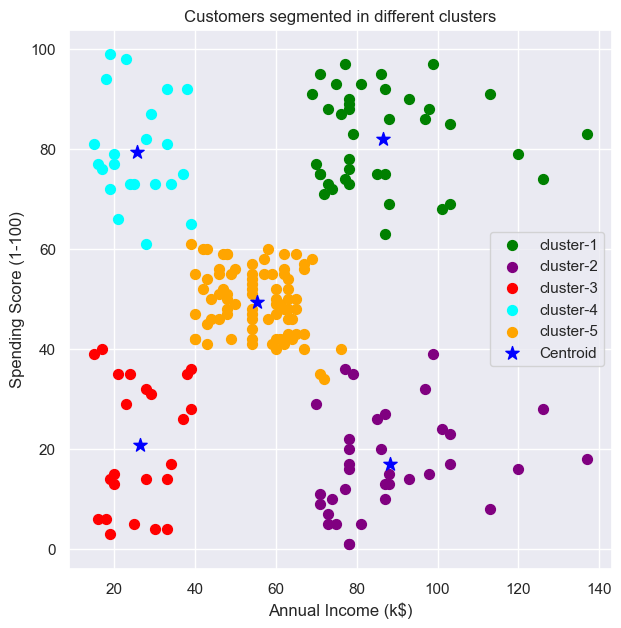

In [39]:
#Plot scatter plot showing different clusters
plt.figure(figsize=(7,7))
plt.scatter(X[y==0,0],X[y==0,1],s=50,c='green',label='cluster-1')
plt.scatter(X[y==1,0],X[y==1,1],s=50,c='purple',label='cluster-2')
plt.scatter(X[y==2,0],X[y==2,1],s=50,c='red',label='cluster-3')
plt.scatter(X[y==3,0],X[y==3,1],s=50,c='cyan',label='cluster-4')
plt.scatter(X[y==4,0],X[y==4,1],s=50,c='orange',label='cluster-5')

#Plot centroids for each clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,marker='*',c='blue',label='Centroid')

plt.title('Customers segmented in different clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### <b>So we can conclude these outcomes from above clusters

<b>1.Cluster-1 i.e green clusters are those customers who have high income and they spent more in malls

<b>2.Cluster-2 i.e purple clusters are those customers who have high income but they spent very less in malls, so malls shopkeepers can plan some offers for them to increase customers spending amount

<b>3.Cluster-3 i.e red clusters are those customers who have low income and hence they spent very less in malls, so malls shopkeepers can plan some offers for them to increase customers spending amount such that there income is not getting spend a lot

<b>4.Cluster-4 i.e cyan clusters are those customers who have low income but still they spent more in malls

<b>5.Cluster-5 i.e orange clusters are those customers who have good income and they spent good amount in malls, so seems to be bit balanced, we can say that these customers are better planners for there income and savings

# <b>Thank You !!!